In [1]:
!pip install jsonmerge
!pip install seaborn
!pip install boto3

In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import importlib 
from jsonmerge import merge # merge all the json's together
import pprint

import results.preprocess as rp
import results.analyze as ra
import results.visualize as rv

importlib.reload(rp) 
importlib.reload(ra) 
importlib.reload(rv)

<module 'results.visualize' from '/Users/prisc/Code/pred-parking-thesis/experiments/domain_adaptation/results/visualize.py'>

We have below hyperparameter tuning settings:

**For Coral(Baseline)**

     250 tuning jobs and 1 experiments
     100 tuning jobs and 3 experiments
    
    
**For DFA**
    
    Weight tying:
    
        250 tuning jobs and 1 experiments
        100 tuning jobs and 3 experiments
 
    Without weight tying:

        250 tuning jobs and 1 experiments 
        100 tuning jobs and 3 experiments 
    
    

    
For all the above settings, we are getting the result of the final run. The final run is a process where we used the best hyperparameter combinations selected by the hyperparameter tuning and train a model. For the final run, we used 200 epoch with early stopping, and do 20 experiments.

When we have 3 experiments, the matthew will be averaged over all the 3 experiments(details please see the experiment part of the thesis)

In [4]:
name_map = {
        "{'Source': ['South Lake Union', 'Commercial Core', 'Pike-Pine', 'Uptown', 'Ballard', 'First Hill', 'Chinatown/ID', 'Pioneer Square'], 'Target': ['Greenlake']}": 'Greenlake',
        "{'Source': ['Greenlake', 'Commercial Core', 'Pike-Pine', 'Uptown', 'Ballard', 'First Hill', 'Chinatown/ID', 'Pioneer Square'], 'Target': ['South Lake Union']}": 'South Lake Union',
        "{'Source': ['Greenlake', 'South Lake Union', 'Pike-Pine', 'Uptown', 'Ballard', 'First Hill', 'Chinatown/ID', 'Pioneer Square'], 'Target': ['Commercial Core']}": 'Commercial Core',
        "{'Source': ['Greenlake', 'South Lake Union', 'Commercial Core', 'Uptown', 'Ballard', 'First Hill', 'Chinatown/ID', 'Pioneer Square'], 'Target': ['Pike-Pine']}": 'Pike-Pine',
        "{'Source': ['Greenlake', 'South Lake Union', 'Commercial Core', 'Pike-Pine', 'Ballard', 'First Hill', 'Chinatown/ID', 'Pioneer Square'], 'Target': ['Uptown']}": 'Uptown',
        "{'Source': ['Greenlake', 'South Lake Union', 'Commercial Core', 'Pike-Pine', 'Uptown', 'First Hill', 'Chinatown/ID', 'Pioneer Square'], 'Target': ['Ballard']}": 'Ballard',
        "{'Source': ['Greenlake', 'South Lake Union', 'Commercial Core', 'Pike-Pine', 'Uptown', 'Ballard', 'Chinatown/ID', 'Pioneer Square'], 'Target': ['First Hill']}": 'First Hill',
        "{'Source': ['Greenlake', 'South Lake Union', 'Commercial Core', 'Pike-Pine', 'Uptown', 'Ballard', 'First Hill', 'Pioneer Square'], 'Target': ['Chinatown/ID']}": 'Chinatown/ID',
        "{'Source': ['Greenlake', 'South Lake Union', 'Commercial Core', 'Pike-Pine', 'Uptown', 'Ballard', 'First Hill', 'Chinatown/ID'], 'Target': ['Pioneer Square']}": 'Pioneer Square'
    }

# Get jsons from final run of different settings

    1. Get the whole json file for all the 6 settings specified above. 
    2. The json file includes the metric like AUC, F1 and so on, later we will only use matthew

### Coral 

#### Coral final run(tuned 250 hyperparameter jobs with 1 experiment)

In [ ]:
with open(f'Parking-Coral-jobs_tune250_exp1.json', 'r') as f:
    name_dict_coral_tune250_exp1 = json.load(f)
    
# retrive the result from that job
coral_tune250_exp1 = rp.get_results(name_dict_coral_tune250_exp1)

In [ ]:
#*** DO NOT THIS CELL RUN IF YOU JUST NEED TO VIEW JSON FILE! Just run json.load to read the json file, instead of json.dump
with open(f'Parking-Coral-results_tune250_exp1.json', 'w') as f:
     json.dump(coral_tune250_exp1,f)

#### Coral final run(tuned 100 hyperparameter jobs with 3 experiments)

In [ ]:
with open(f'Parking-Coral-jobs_tune100_exp3.json', 'r') as f:
    name_dict_coral_tune100_exp3 = json.load(f)
    
# retrive the result from that job
coral_tune100_exp3 = rp.get_results(name_dict_coral_tune100_exp3)

In [ ]:
#*** DO NOT THIS CELL RUN IF YOU JUST NEED TO VIEW JSON FILE! Just run json.load to read the json file, instead of json.dump
with open(f'Parking-Coral-results_tune100_exp3.json', 'w') as f:
     json.dump(coral_tune100_exp3,f)

### DFA

#### DFA final run(tuned 250 hyperparameter jobs with 1 experiment)

In [ ]:
with open(f'Parking-DFA-jobs_tune250_exp1.json', 'r') as f:
    name_dict_dfa_tune250_exp1 = json.load(f)
    
# retrive the result from that job
dfa_tune250_exp1 = rp.get_results(name_dict_dfa_tune250_exp1)

In [ ]:
#*** DO NOT THIS CELL RUN IF YOU JUST NEED TO VIEW JSON FILE! Just run json.load to read the json file, instead of json.dump
with open(f'Parking-DFA-results_tune250_exp1.json', 'w') as f:
     json.dump(dfa_tune250_exp1,f)

#### DFA final run(tuned 100 hyperparameter jobs with 3 experiment)

In [ ]:
with open(f'Parking-DFA-jobs_tune100_exp3.json', 'r') as f:
    name_dict_dfa_tune100_exp3 = json.load(f)
    
# retrive the result from that job
dfa_tune100_exp3 = rp.get_results(name_dict_dfa_tune100_exp3)

In [ ]:
#*** DO NOT THIS CELL RUN IF YOU JUST NEED TO VIEW JSON FILE! Just run json.load to read the json file, instead of json.dump
with open(f'Parking-DFA-results_tune100_exp3.json', 'w') as f:
     json.dump(dfa_tune100_exp3,f)

#### DFA final run with weight tying(tuned 250 hyperparameter jobs with 1 experiment)

In [ ]:
with open(f'Parking-DFA-jobs_wt_tune250_exp1.json', 'r') as f:
    name_dict_dfa_wt_tune250_exp1 = json.load(f)
    
# retrive the result from that job
dfa_wt_tune250_exp1 = rp.get_results(name_dict_dfa_wt_tune250_exp1)

In [ ]:
#*** DO NOT THIS CELL RUN IF YOU JUST NEED TO VIEW JSON FILE! Just run json.load to read the json file, instead of json.dump!!
with open(f'Parking-DFA-results_wt_tune250_exp1.json', 'w') as f:
     json.dump(dfa_wt_tune250_exp1,f)

#### DFA final run with weight tying(tuned 100 hyperparameter jobs with 3 experiments)

In [ ]:
with open(f'Parking-DFA-jobs_wt_tune100_exp3.json', 'r') as f:
    name_dict_dfa_wt_tune100_exp3 = json.load(f)
    
# retrive the result from that job
dfa_wt_tune100_exp3 = rp.get_results(name_dict_dfa_wt_tune100_exp3)

In [ ]:
#*** DO NOT THIS CELL RUN IF YOU JUST NEED TO VIEW JSON FILE! Just run json.load to read the json file, instead of json.dump
with open(f'Parking-DFA-results_wt_tune100_exp3.json', 'w') as f:
     json.dump(dfa_wt_tune100_exp3,f)

#### Put all the jsons in one big json

In [ ]:
#*** DO NOT THIS CELL RUN IF YOU JUST NEED TO VIEW JSON FILE! RUN below cell with json.read instead!!
result_coral = merge(coral_tune250_exp1, coral_tune100_exp3)
result_dfa = merge(dfa_tune250_exp1, dfa_tune100_exp3)
result_dfa_weight_tying = merge(dfa_wt_tune250_exp1, dfa_wt_tune100_exp3)


result_temp = merge(result_coral, result_dfa)
result = merge(result_temp, result_dfa_weight_tying)

In [ ]:
result_coral.keys()

In [ ]:
result_dfa.keys()

In [ ]:
result_dfa_weight_tying.keys()

In [ ]:
with open('result_all.json', 'w') as f:
    json.dump(result ,f)

In [5]:
with open('result_all.json', 'r') as f:
    result = json.load(f)

# Preprocess the Result

    1. swap the key between metric and area(area first and then metric)
    2. rename the area with only the target area and rename the matthew to test_matthew to avoid confusion

In [6]:
# this map matches the final run job name with the hyperparameter experiment setting name (no. of jobs and exepriments)
setting_map = {
    'domain-adaptation_Coral-final-domain-adaptation-Tune250Ex-2021-09-12-08-38-45-347_output': 'Coral-tune-250-job-1-experi',
    'domain-adaptation_Coral-final-domain-adaptation-Tune100Ex-2021-09-12-17-19-31-644_output': 'Coral-tune-100-job-3-experi',
    'domain-adaptation_DFA-final-domain-adaptation-2021-09-08-19-37-27-999_output':'DFA-tune-250-job-1-experi',
    'domain-adaptation_DFA-final-domain-adaptation-2021-09-09-20-39-14-131_output': 'DFA-tune-100-job-3-experi',
    'domain-adaptation_DFA-final-domain-adaptation-2021-09-09-15-39-08-635_output': 'DFA-weight-tie-tune-250-job-1-experi',
    'domain-adaptation_DFA-final-domain-adaptation-2021-09-11-11-23-18-211_output': 'DFA-weight-tie-tune-100-job-3-experi'

}

In [7]:
# rename the first level key according to above map, so we could better distiguish between different settings

for old_name, new_name in setting_map.items():
    if old_name in list(result.keys()):
        result[new_name] = result.pop(old_name)

In [8]:
result.keys()

dict_keys(['Coral-tune-250-job-1-experi', 'Coral-tune-100-job-3-experi', 'DFA-tune-250-job-1-experi', 'DFA-tune-100-job-3-experi', 'DFA-weight-tie-tune-250-job-1-experi', 'DFA-weight-tie-tune-100-job-3-experi'])

In [9]:
# get the mean
df_means_raw = rp.get_metric_df(result, get_mean=True)
# rename and only select matthews
df_means = rp.select_matthew_rename(df_means_raw, name_map)
df_means

val_matthew  \
target area      setting                                             
Greenlake        Coral-tune-250-job-1-experi                  0.35   
                 Coral-tune-100-job-3-experi                  0.34   
                 DFA-tune-250-job-1-experi                    0.25   
                 DFA-tune-100-job-3-experi                    0.28   
                 DFA-weight-tie-tune-250-job-1-experi         0.21   
                 DFA-weight-tie-tune-100-job-3-experi         0.24   
South Lake Union Coral-tune-250-job-1-experi                  0.18   
                 Coral-tune-100-job-3-experi                  0.19   
                 DFA-tune-250-job-1-experi                    0.21   
                 DFA-tune-100-job-3-experi                    0.23   
                 DFA-weight-tie-tune-250-job-1-experi         0.18   
                 DFA-weight-tie-tune-100-job-3-experi         0.20   
Commercial Core  Coral-tune-250-job-1-experi                  0.17   
                 Coral-tune-100-job-3-experi                  0.17   
                 DFA-tune-250-job-1-experi                    0.18   
                 DFA-tune-100-job-3-experi                    0.17   
                 DFA-weight-tie-tune-250-job-1-experi         0.17   
                 DFA-weight-tie-tune-100-job-3-experi         0.19   
Pike-Pine        Coral-tune-250-job-1-experi                  0.39   
                 Coral-tune-100-job-3-experi                  0.35   
                 DFA-tune-250-job-1-experi                    0.36   
                 DFA-tune-100-job-3-experi                    0.37   
                 DFA-weight-tie-tune-250-job-1-experi         0.34   
                 DFA-weight-tie-tune-100-job-3-experi         0.35   
Uptown           Coral-tune-250-job-1-experi                  0.19   
                 Coral-tune-100-job-3-experi                  0.20   
                 DFA-tune-250-job-1-experi                    0.27   
                 DFA-tune-100-job-3-experi                    0.25   
                 DFA-weight-tie-tune-250-job-1-experi         0.22   
                 DFA-weight-tie-tune-100-job-3-experi         0.27   
Ballard          Coral-tune-250-job-1-experi                  0.28   
                 Coral-tune-100-job-3-experi                  0.21   
                 DFA-tune-250-job-1-experi                    0.25   
                 DFA-tune-100-job-3-experi                    0.25   
                 DFA-weight-tie-tune-250-job-1-experi         0.27   
                 DFA-weight-tie-tune-100-job-3-experi         0.24   
First Hill       Coral-tune-250-job-1-experi                  0.13   
                 Coral-tune-100-job-3-experi                  0.14   
                 DFA-tune-250-job-1-experi                    0.15   
                 DFA-tune-100-job-3-experi                    0.15   
                 DFA-weight-tie-tune-250-job-1-experi         0.11   
                 DFA-weight-tie-tune-100-job-3-experi         0.12   
Chinatown/ID     Coral-tune-250-job-1-experi                  0.24   
                 Coral-tune-100-job-3-experi                  0.23   
                 DFA-tune-250-job-1-experi                    0.28   
                 DFA-tune-100-job-3-experi                    0.28   
                 DFA-weight-tie-tune-250-job-1-experi         0.21   
                 DFA-weight-tie-tune-100-job-3-experi         0.25   
Pioneer Square   Coral-tune-250-job-1-experi                  0.24   
                 Coral-tune-100-job-3-experi                  0.25   
                 DFA-tune-250-job-1-experi                    0.22   
                 DFA-tune-100-job-3-experi                    0.23   
                 DFA-weight-tie-tune-250-job-1-experi         0.26   
                 DFA-weight-tie-tune-100-job-3-experi         0.19   

                                                       test_matthew  
target area      setting                                        

In [10]:
df_all_raw = rp.get_metric_df(result, get_mean=False)
df_all = rp.select_matthew_rename(df_all_raw, name_map)
df_all

val_matthew  \
target area      setting                                                                                   
Greenlake        Coral-tune-250-job-1-experi           [0.2727963461957739, 0.2754898187627465, 0.450...   
                 Coral-tune-100-job-3-experi           [0.46177515618420606, 0.3093842136758484, 0.26...   
                 DFA-tune-250-job-1-experi             [0.2904249343087462, 0.266568717101032, 0.2842...   
                 DFA-tune-100-job-3-experi             [0.24299438081991453, 0.18595213070661323, 0.3...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.3011674601564754, 0.33256157335279174, 0.10...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.22188837229734582, 0.2731976820012801, 0.34...   
South Lake Union Coral-tune-250-job-1-experi           [0.17900690182359125, 0.14534262834858253, 0.1...   
                 Coral-tune-100-job-3-experi           [0.12960222908203636, 0.15573297542620085, 0.1...   
                 DFA-tune-250-job-1-experi             [0.21640094476134517, 0.2214492318913486, 0.24...   
                 DFA-tune-100-job-3-experi             [0.2117452639278466, 0.20530461909408787, 0.30...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.22137199392668558, 0.20334748070103917, 0.1...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.17673461879349972, 0.18285263084630593, 0.3...   
Commercial Core  Coral-tune-250-job-1-experi           [0.12989214133687024, 0.20038056305242047, 0.1...   
                 Coral-tune-100-job-3-experi           [0.0752057470336944, 0.05507308582643316, 0.22...   
                 DFA-tune-250-job-1-experi             [0.18266109224395974, 0.21003139488404765, 0.1...   
                 DFA-tune-100-job-3-experi             [0.1954415013741837, 0.15435256685406804, 0.13...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.18867638681570442, 0.1946609384021317, 0.16...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.22152857951263327, 0.113087985233023, 0.124...   
Pike-Pine        Coral-tune-250-job-1-experi           [0.32216905901116427, 0.47613402785295084, 0.3...   
                 Coral-tune-100-job-3-experi           [0.3203785253824485, 0.4385364647137748, 0.375...   
                 DFA-tune-250-job-1-experi             [0.4142585780542455, 0.1791398819595698, 0.221...   
                 DFA-tune-100-job-3-experi             [0.34426518632954817, 0.3679293643424185, 0.26...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.4187615427230789, 0.37831829711148207, 0.26...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.316933489655713, 0.39320632188869614, 0.363...   
Uptown           Coral-tune-250-job-1-experi           [0.29265303768418355, 0.32536275519404334, -0....   
                 Coral-tune-100-job-3-experi           [0.28377708197380946, 0.060844291594815025, 0....   
                 DFA-tune-250-job-1-experi             [0.1520268447718336, 0.262016187037182, 0.5182...   
                 DFA-tune-100-job-3-experi             [0.4013030167541426, 0.45347165328211847, 0.31...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.2587643449739928, 0.07457822756302887, 0.28...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.3008284187980934, 0.11998414563035742, 0.17...   
Ballard          Coral-tune-250-job-1-experi           [0.16487654055753714, 0.3566672657555477, 0.18...   
                 Coral-tune-100-job-3-experi           [0.1320388449081987, 0.2639726724790241, 0.275...   
                 DFA-tune-250-job-1-experi             [0.3671222717145562, 0.21092949466626848, 0.21...   
                 DFA-tune-100-job-3-experi             [0.32732683535398854, 0.17140788278807567, 0.2...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.22390553775994954, 0.3473469607538846, 0.41...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.310946632584621, 0.11479681623468638, 0

# Result

## Get Mean of Matthew

For each algorithm, for each experiments setting, get their average matthew result. The average is calculated by averaging across different area combinations and different experiments

In [11]:
mean_of_mean = ra.get_mean_of_mean(df_means)

In [12]:
mean_of_mean 

,avg_val_matthew,avg_test_matthew
Coral-tune-250-job-1-experi,0.241111,0.171111
Coral-tune-100-job-3-experi,0.231111,0.172222
DFA-tune-250-job-1-experi,0.241111,0.160000
DFA-tune-100-job-3-experi,0.245556,0.166667
DFA-weight-tie-tune-250-job-1-experi,0.218889,0.152222
DFA-weight-tie-tune-100-job-3-experi,0.227778,0.145556


In [13]:
# overfitting 100 -300 jobs, reduced a little (brifef)
# 250 abosumute number may not need

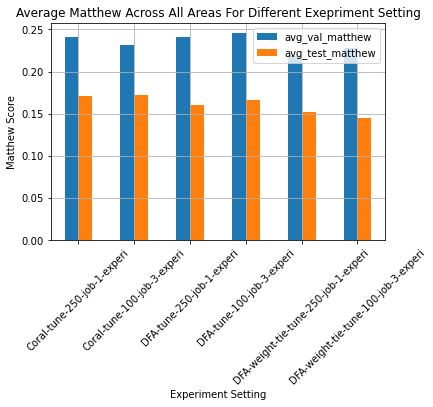

In [14]:
rv.plot_mean_of_mean(mean_of_mean, figsize=None)

# Result Analysis

## Correlation between no. of data points in area and the matthew

For the setting which gives us the highest validation matthew, we plot the correlation between the number of data points in one area and the test_matthew or val matthew 

In [16]:
# get the name of setting which gives highest test matthew and get the dataframe
highest_val_mean = mean_of_mean.loc[mean_of_mean['avg_test_matthew'] == mean_of_mean['avg_test_matthew'].max()].index[0]
df_highest_mean = df_means.loc[(slice(None), highest_val_mean),:]

# drop the setting level index
df_highest_mean.index =  df_highest_mean.index.droplevel(1)

In [17]:
highest_val_mean

'Coral-tune-100-job-3-experi'

,val_matthew,test_matthew
target area,,
Greenlake,0.34,0.28
South Lake Union,0.19,0.14
Commercial Core,0.17,0.15
Pike-Pine,0.35,0.28
Uptown,0.20,0.11
Ballard,0.21,0.16
First Hill,0.14,0.08
Chinatown/ID,0.23,0.18
Pioneer Square,0.25,0.17


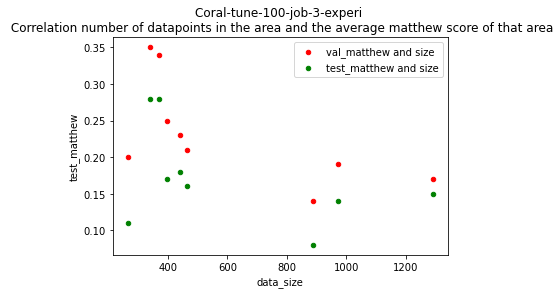

In [18]:
ra.corr_area_size_matthew(df_highest_mean, highest_val_mean)

In [19]:
# coral easy(clustering), domain shift tackle, does not need too many data points, output model DFA

## Boxplot for valid and test matthew across areas

In [20]:
df_all

val_matthew  \
target area      setting                                                                                   
Greenlake        Coral-tune-250-job-1-experi           [0.2727963461957739, 0.2754898187627465, 0.450...   
                 Coral-tune-100-job-3-experi           [0.46177515618420606, 0.3093842136758484, 0.26...   
                 DFA-tune-250-job-1-experi             [0.2904249343087462, 0.266568717101032, 0.2842...   
                 DFA-tune-100-job-3-experi             [0.24299438081991453, 0.18595213070661323, 0.3...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.3011674601564754, 0.33256157335279174, 0.10...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.22188837229734582, 0.2731976820012801, 0.34...   
South Lake Union Coral-tune-250-job-1-experi           [0.17900690182359125, 0.14534262834858253, 0.1...   
                 Coral-tune-100-job-3-experi           [0.12960222908203636, 0.15573297542620085, 0.1...   
                 DFA-tune-250-job-1-experi             [0.21640094476134517, 0.2214492318913486, 0.24...   
                 DFA-tune-100-job-3-experi             [0.2117452639278466, 0.20530461909408787, 0.30...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.22137199392668558, 0.20334748070103917, 0.1...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.17673461879349972, 0.18285263084630593, 0.3...   
Commercial Core  Coral-tune-250-job-1-experi           [0.12989214133687024, 0.20038056305242047, 0.1...   
                 Coral-tune-100-job-3-experi           [0.0752057470336944, 0.05507308582643316, 0.22...   
                 DFA-tune-250-job-1-experi             [0.18266109224395974, 0.21003139488404765, 0.1...   
                 DFA-tune-100-job-3-experi             [0.1954415013741837, 0.15435256685406804, 0.13...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.18867638681570442, 0.1946609384021317, 0.16...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.22152857951263327, 0.113087985233023, 0.124...   
Pike-Pine        Coral-tune-250-job-1-experi           [0.32216905901116427, 0.47613402785295084, 0.3...   
                 Coral-tune-100-job-3-experi           [0.3203785253824485, 0.4385364647137748, 0.375...   
                 DFA-tune-250-job-1-experi             [0.4142585780542455, 0.1791398819595698, 0.221...   
                 DFA-tune-100-job-3-experi             [0.34426518632954817, 0.3679293643424185, 0.26...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.4187615427230789, 0.37831829711148207, 0.26...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.316933489655713, 0.39320632188869614, 0.363...   
Uptown           Coral-tune-250-job-1-experi           [0.29265303768418355, 0.32536275519404334, -0....   
                 Coral-tune-100-job-3-experi           [0.28377708197380946, 0.060844291594815025, 0....   
                 DFA-tune-250-job-1-experi             [0.1520268447718336, 0.262016187037182, 0.5182...   
                 DFA-tune-100-job-3-experi             [0.4013030167541426, 0.45347165328211847, 0.31...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.2587643449739928, 0.07457822756302887, 0.28...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.3008284187980934, 0.11998414563035742, 0.17...   
Ballard          Coral-tune-250-job-1-experi           [0.16487654055753714, 0.3566672657555477, 0.18...   
                 Coral-tune-100-job-3-experi           [0.1320388449081987, 0.2639726724790241, 0.275...   
                 DFA-tune-250-job-1-experi             [0.3671222717145562, 0.21092949466626848, 0.21...   
                 DFA-tune-100-job-3-experi             [0.32732683535398854, 0.17140788278807567, 0.2...   
                 DFA-weight-tie-tune-250-job-1-experi  [0.22390553775994954, 0.3473469607538846, 0.41...   
                 DFA-weight-tie-tune-100-job-3-experi  [0.310946632584621, 0.11479681623468638, 0

In [21]:
# get that setting's df
df = df_all.loc[(slice(None), highest_val_mean),:]
df.index = df.loc[(slice(None), highest_val_mean),:].index.droplevel(1)

#### only plot test matthew

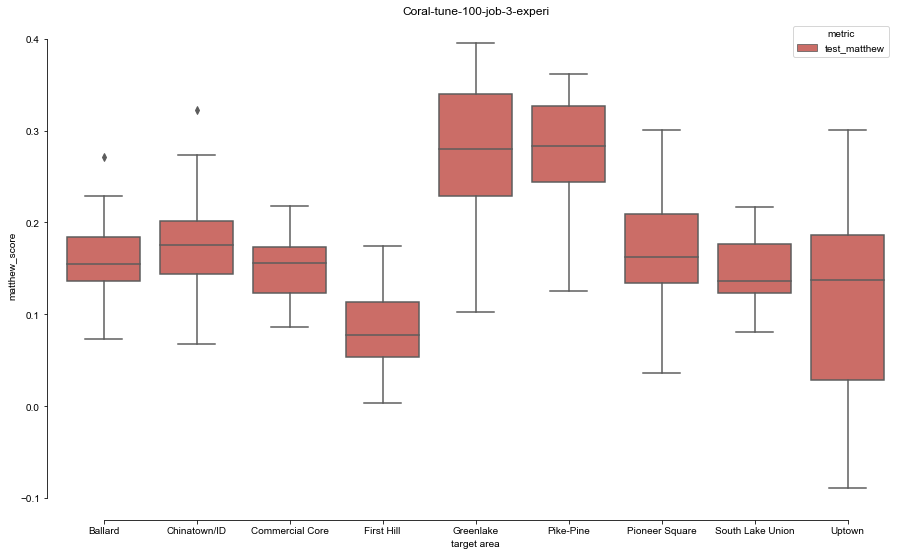

In [22]:
## preprocess --to be able to plot the box plot
data_test_matthew = rp.preprocess_for_boxplot(df,test_matthew_only=True)

# plot box 
rv.plot_matthew_per_area(data_test_matthew , highest_val_mean, (15,9)) 

#### plot both test and valid matthew

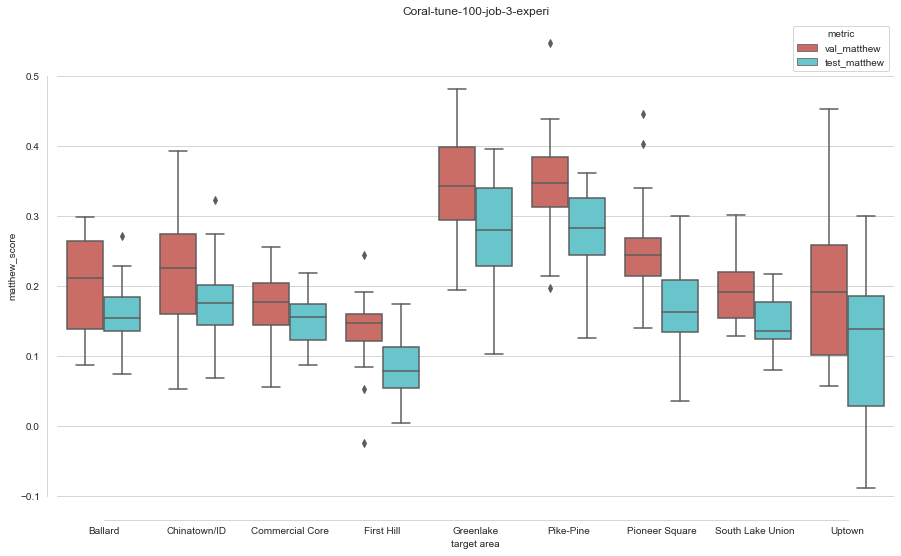

In [23]:
## preprocess --to be able to plot the box plot
data = rp.preprocess_for_boxplot(df)

# plot box 
rv.plot_matthew_per_area(data, highest_val_mean, (15,9)) 

**The results we have outperform the baseline model(Catboost model direct transfer on hold out area with matthew score 0.160) by very small amount. As we can see, there is overfitting from in validation set for all the areas, even we did a random split to generate the validation and test dataset. There are several ways we think could be elivating this kind of overfitting:**
    
    1) As we have started 250 jobs when we tune the hyperparameter, we could reduce the number of searching hyperparameter jobs to 100.
    2) Our search has used early stop within the epochs, so we do not need to change here
    3) we could increase the number of experiments, as for this case, we only run 1 experiments, it might be that the hyperparameter we get on that one experiments is by coincidance, therefore we could run 3 experiments and use the averaged result of those;